In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import plotly.express as px

DATA COLLECTION

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data = gold_data.drop(columns = 'Date', axis = 1)

DATA UNDERSTANDING

In [4]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [6]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Exploring Data Distribution

In [8]:
fig = px.histogram(x = gold_data['SPX'],
                   title = 'Distribution of SPX', width=800, height=400,
                   labels = {'x': 'SPX values', 'y': 'Count'})

fig.show()

In [9]:
fig = px.histogram(x = gold_data['GLD'],
                   title = 'Distribution of GLD', width=800, height=400,
                   labels = {'x': 'GLD values', 'y': 'Count'})

fig.show()

In [10]:
fig = px.histogram(x = gold_data['USO'],
                   title = 'Distribution of USO', width=800, height=400,
                   labels = {'x': 'USO values', 'y': 'Count'})

fig.show()

In [11]:
fig = px.histogram(x = gold_data['SLV'],
                   title = 'Distribution of SLV', width=800, height=400,
                   labels = {'x': 'SLV values', 'y': 'Count'})

fig.show()

In [12]:
fig = px.histogram(x = gold_data['EUR/USD'],
                   title = 'Distribution of EUR/USD', width=800, height=400,
                   labels = {'x': 'EUR/USD values', 'y': 'Count'})

fig.show()

CORRELATION

In [13]:
correlation = gold_data.corr()

<Axes: >

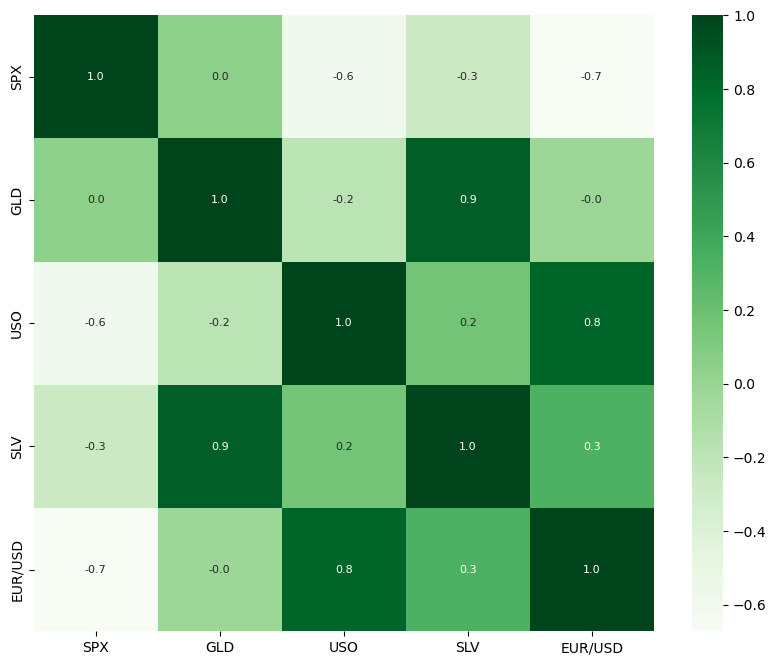

In [14]:
plt.figure(figsize = (10,8))
sb.heatmap(correlation, cbar = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Greens' )

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\garri\AppData\Local\Temp\ipykernel_1612\4031929058.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='GLD', ylabel='Density'>

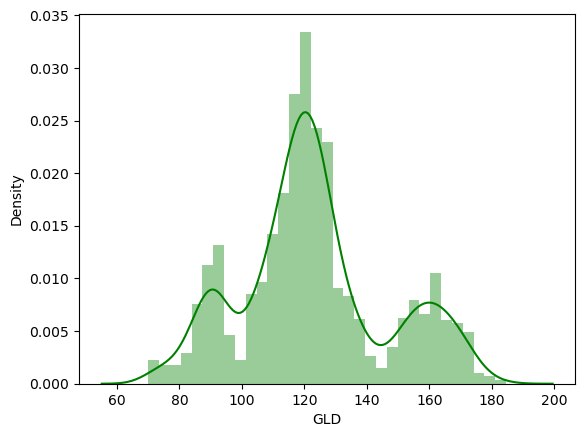

In [16]:
sb.distplot(gold_data['GLD'], color = 'green')

SPLITING FEATURES AND TARGET

In [17]:
x = gold_data.drop(['GLD'], axis = 1)
y = gold_data['GLD']

In [18]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [19]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

MULTICOLLINEARITY CHECK

In [20]:
#multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = x
calc_vif(X)

,variables,VIF
0,SPX,12.822756
1,USO,8.685573
2,SLV,10.488463
3,EUR/USD,46.643067


In [21]:
#TREATING MULTICOLLINEARITY

In [22]:
x = x.drop(['EUR/USD'], axis = 1)

In [23]:
#multicollinearity test after treating
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = x
calc_vif(X)

,variables,VIF
0,SPX,4.187809
1,USO,3.269818
2,SLV,6.573362


NORMALITY CHECK

In [24]:
from scipy.stats import shapiro
import pandas as pd

def shapiro_wilk_test(df, alpha=0.05):
    normality_result = pd.DataFrame(columns=['Variable', 'W-statistic', 'P-value', 'Normal'])

    for column in df.columns:
        w_stat, p_value = shapiro(df[column].dropna())
        normal = 'Yes' if p_value > alpha else 'No'

        normality_result = pd.concat([normality_result, pd.DataFrame({
            'Variable': [column],
            'W-statistic': [w_stat],
            'P-value': [p_value],
            'Normal': [normal]
        })], ignore_index=True)

    return normality_result

shapiro_result = shapiro_wilk_test(gold_data)
print(shapiro_result)

  Variable  W-statistic       P-value Normal
0      SPX     0.956135  1.046160e-25     No
1      GLD     0.963988  1.847619e-23     No
2      USO     0.794605  0.000000e+00     No
3      SLV     0.859715  3.555234e-41     No
4  EUR/USD     0.967798  3.103745e-22     No


In [25]:
#LOG TRANSFORMATION TO BRIM THE DATA CLOSE TO NORMAL
gold_data = gold_data.apply(lambda z: np.log1p(z))
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,7.278049,4.452718,4.375380,2.783776,0.904903
1,7.278049,4.460953,4.374121,2.790244,0.906035
2,7.253208,4.455858,4.360675,2.782972,0.906439
3,7.256424,4.451669,4.337291,2.775896,0.903529
4,7.237915,4.474834,4.344584,2.808800,0.938873


In [26]:
x = gold_data.drop(['GLD'], axis = 1)
x = gold_data.drop(['EUR/USD'], axis = 1)
y = gold_data['GLD']

MODELING AND EVALUATION

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)  # Evaluate model
    print(f"{name}: {score}")


Decision Tree: 0.9999566268933812
Random Forest: 0.9999843968514697
Support Vector Machine: 0.9333231258149204
K-Nearest Neighbors: 0.9979883128287391
